In [1]:
import numpy as np

In [2]:
X=np.load('mfcc_pairs_sg.npy',allow_pickle=False)

In [3]:
Y=np.load('mfcc_pairs_labels_sg.npy',allow_pickle=False)

In [4]:
import tensorflow as tf


In [5]:
X.shape

(294054, 13, 154)

In [6]:
Y.shape

(294054, 13, 154)

In [7]:
X=np.asarray(X).transpose(0,2,1)
Y=np.asarray(Y).transpose(0,2,1)
X.shape

(294054, 154, 13)

In [8]:
checkpoint_path = "training_2/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights every 5 epochs
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1, 
    save_weights_only=True,
    period=5)

In [9]:
# train_dataset = tf.data.Dataset.from_tensor_slices((X, Y))

In [10]:
Y.shape

(294054, 154, 13)

In [12]:
embeddingDim=10
timesteps = 154
n_features = 13

NameError: name 'model_tf' is not defined

In [14]:
model_tf = tf.keras.models.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=embeddingDim,return_sequences=False),input_shape=(timesteps,n_features)),
    tf.keras.layers.RepeatVector(timesteps),
    tf.keras.layers.LSTM(embeddingDim,activation='relu',return_sequences=True),
    # SeqSelfAttention(embeddingDim,attention_activation='sigmoid',return_attention=True),
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(n_features))
    ])


model_tf.compile(optimizer='adam',
              loss=tf.losses.mean_squared_error,
              metrics=['accuracy'])

In [15]:
model_tf.save_weights(checkpoint_path.format(epoch=0))

In [16]:
model_tf.fit(X,Y,epochs=20,batch_size=1000,callbacks=[cp_callback])

Train on 294054 samples
Epoch 1/20
294054/294054 [==============================] - 328s 1ms/sample - loss: 0.0064 - accuracy: 0.0370
Epoch 2/20
294054/294054 [==============================] - 316s 1ms/sample - loss: 0.0063 - accuracy: 0.0381
Epoch 3/20
294054/294054 [==============================] - 315s 1ms/sample - loss: 0.0063 - accuracy: 0.0381
Epoch 4/20
294054/294054 [==============================] - 316s 1ms/sample - loss: 0.0063 - accuracy: 0.0381
Epoch 5/20
294000/294054 [============================>.] - ETA: 0s - loss: 0.0063 - accuracy: 0.0381
Epoch 00005: saving model to training_2/cp-0005.ckpt
294054/294054 [==============================] - 314s 1ms/sample - loss: 0.0063 - accuracy: 0.0381
Epoch 6/20
294054/294054 [==============================] - 331s 1ms/sample - loss: 0.0063 - accuracy: 0.0381
Epoch 7/20
294054/294054 [==============================] - 292s 994us/sample - loss: 0.0063 - accuracy: 0.0381
Epoch 8/20
294054/294054 [==============================] - 

In [17]:
model_tf.save('Model10_sg')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: Model10_sg\assets


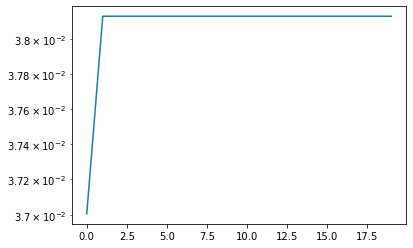

In [29]:
import matplotlib.pyplot as plt     
plt.semilogy(model_tf.history.history['accuracy'])